# Análisis de COVID-19 en Estados Unidos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Cargar los datos procesados
data_dir = Path.cwd().parent / 'data' / 'processed'
df = pd.read_csv(data_dir / 'cleaned_covid19_data.csv', parse_dates=['date'])
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,mortality_rate,new_cases
0,2020-03-17,AK,3.0,NaN,NaN,NaN,totalTestsViral,337.0,NaN,1.0,...,0,6068bcb8f440ae47f7728cae3828396c2ce7b40d,0,0,0,0,0,NaN,0.0,NaN
1,2020-03-18,AK,8.0,NaN,NaN,NaN,totalTestsViral,412.0,NaN,1.0,...,0,afc74332e61d8646d093dbdb9dc0fa65bad72804,0,0,0,0,0,NaN,0.0,5.0
2,2020-03-19,AK,11.0,NaN,NaN,NaN,totalTestsViral,438.0,NaN,1.0,...,0,60f26c10c0d8de513f7afec218a1fdf2240a7ffd,0,0,0,0,0,NaN,0.0,3.0
3,2020-03-20,AK,14.0,NaN,NaN,NaN,totalTestsViral,698.0,NaN,1.0,...,0,e2f681213889eb5e05422b400337d0b2f92cc124,0,0,0,0,0,NaN,0.0,3.0
4,2020-03-21,AK,15.0,NaN,NaN,NaN,totalTestsViral,772.0,NaN,1.0,...,0,3c7d5c9ed1de9bcde6e678bdee54b2c305cf2526,0,0,0,0,0,NaN,0.0,1.0


## Exploración Inicial de Datos

In [3]:
print(df.info())
print("\nEstadísticas descriptivas:")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12354 entries, 0 to 12353
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         12354 non-null  datetime64[ns]
 1   state                        12354 non-null  object        
 2   positive                     12354 non-null  float64       
 3   probableCases                6418 non-null   float64       
 4   negative                     8535 non-null   float64       
 5   pending                      1313 non-null   float64       
 6   totalTestResultsSource       12354 non-null  object        
 7   totalTestResults             12347 non-null  float64       
 8   hospitalizedCurrently        11294 non-null  float64       
 9   hospitalizedCumulative       12354 non-null  float64       
 10  inIcuCurrently               7087 non-null   float64       
 11  inIcuCumulative              3789 non-nul

,date,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,mortality_rate,new_cases
count,12354,1.235400e+04,6418.000000,8.535000e+03,1313.000000,1.234700e+04,11294.000000,12354.000000,7087.000000,3789.000000,...,12354.000000,12354.000000,12354.0,12354.0,12354.0,12354.0,12354.0,0.0,12354.000000,12314.000000
mean,2020-09-17 15:36:13.288004096,1.446343e+05,21967.359769,1.046913e+06,2006.108911,1.813681e+06,832.867540,9283.741784,222.019754,1934.191607,...,19.855755,63.942286,0.0,0.0,0.0,0.0,0.0,NaN,2.478523,1206.707325
min,2020-03-13 00:00:00,3.000000e+00,0.000000,9.400000e+01,0.000000,3.370000e+02,1.000000,1.000000,0.000000,6.000000,...,-174.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,-7757.000000
25%,2020-06-26 00:00:00,1.173600e+04,1168.250000,1.402165e+05,201.000000,2.338555e+05,155.000000,998.250000,64.000000,501.000000,...,1.000000,3.000000,0.0,0.0,0.0,0.0,0.0,NaN,1.304535,138.000000
50%,2020-09-18 00:00:00,5.583500e+04,5264.500000,4.783980e+05,389.000000,8.251000e+05,460.000000,4496.500000,160.000000,1295.000000,...,7.000000,25.000000,0.0,0.0,0.0,0.0,0.0,NaN,1.868840,524.000000
75%,2020-12-12 00:00:00,1.782652e+05,21574.750000,1.393383e+06,3620.000000,2.233290e+06,1045.750000,12267.250000,309.000000,2451.000000,...,23.000000,72.000000,0.0,0.0,0.0,0.0,0.0,NaN,3.119066,1338.000000
max,2021-03-07 00:00:00,1.909209e+06,360372.000000,1.018694e+07,17869.000000,2.233918e+07,9520.000000,82237.000000,1311.000000,9263.000000,...,2559.000000,16373.000000,0.0,0.0,0.0,0.0,0.0,NaN,9.351050,31605.000000
std,NaN,2.221860e+05,42161.193047,1.501737e+06,2642.862191,2.661176e+06,1100.007252,12627.134015,214.760272,1953.329983,...,44.467401,242.751745,0.0,0.0,0.0,0.0,0.0,NaN,1.742396,1922.024828


## Análisis de Casos Totales por Estado

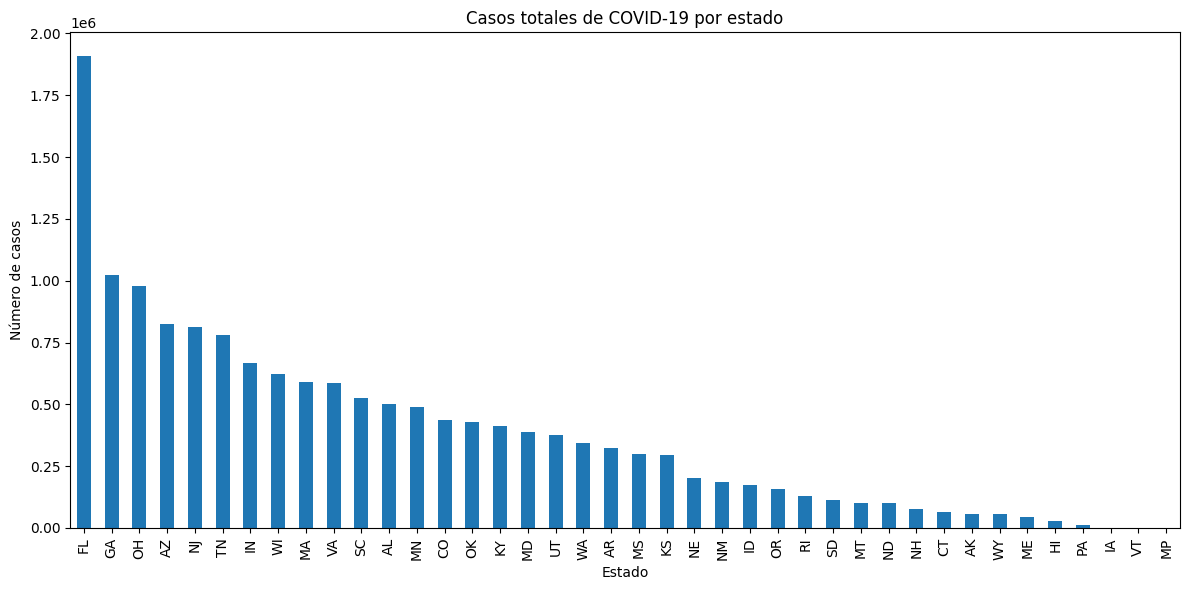

El estado con más casos es FL con 1,909,209.0 casos.
Los 5 estados más afectados son: FL, GA, OH, AZ, NJ


In [4]:
plt.figure(figsize=(12, 6))
cases_by_state = df.groupby('state')['positive'].max().sort_values(ascending=False)
cases_by_state.plot(kind='bar')
plt.title('Casos totales de COVID-19 por estado')
plt.xlabel('Estado')
plt.ylabel('Número de casos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"El estado con más casos es {cases_by_state.index[0]} con {cases_by_state.iloc[0]:,} casos.")
print(f"Los 5 estados más afectados son: {', '.join(cases_by_state.index[:5])}")

## Evolución de Casos en los Estados Más Afectados

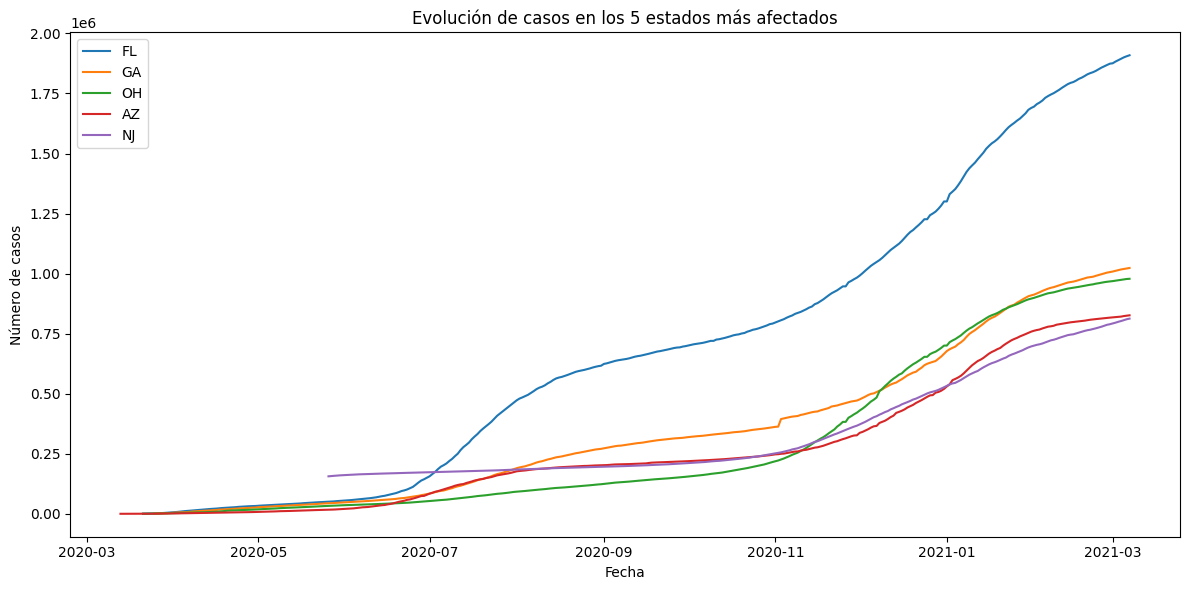

In [5]:
top_5_states = cases_by_state.index[:5]
plt.figure(figsize=(12, 6))
for state in top_5_states:
    state_data = df[df['state'] == state].sort_values('date')
    plt.plot(state_data['date'], state_data['positive'], label=state)
plt.title('Evolución de casos en los 5 estados más afectados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.tight_layout()
plt.show()

## Análisis de la Tasa de Mortalidad

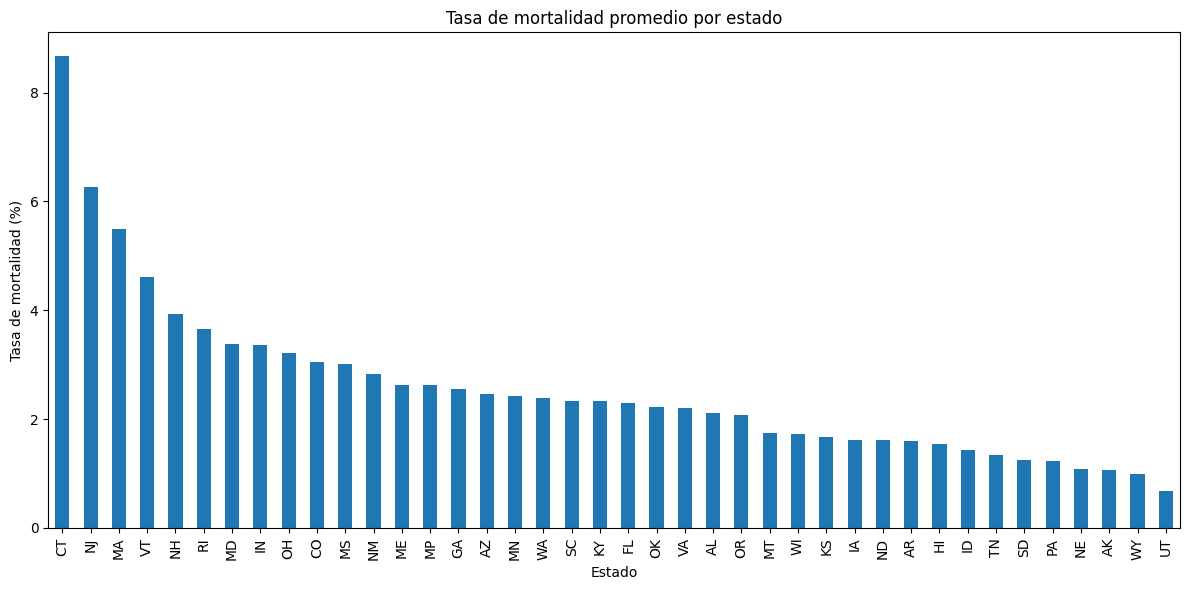

El estado con la tasa de mortalidad más alta es CT con 8.67%
El estado con la tasa de mortalidad más baja es UT con 0.69%


In [6]:
df['mortality_rate'] = df['death'] / df['positive'] * 100
mortality_rate = df.groupby('state')['mortality_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
mortality_rate.plot(kind='bar')
plt.title('Tasa de mortalidad promedio por estado')
plt.xlabel('Estado')
plt.ylabel('Tasa de mortalidad (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"El estado con la tasa de mortalidad más alta es {mortality_rate.index[0]} con {mortality_rate.iloc[0]:.2f}%")
print(f"El estado con la tasa de mortalidad más baja es {mortality_rate.index[-1]} con {mortality_rate.iloc[-1]:.2f}%")

## Correlación entre Variables

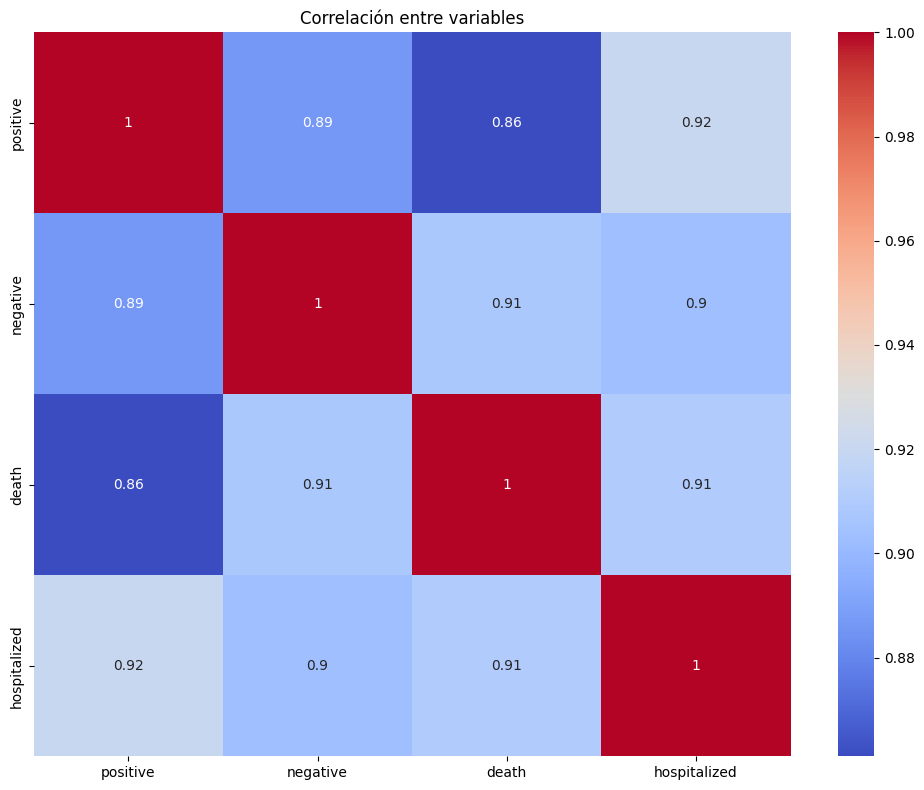

In [7]:
correlation_matrix = df[['positive', 'negative', 'death', 'hospitalized']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.tight_layout()
plt.show()

## Conclusiones

## Conclusiones

Basado en nuestro análisis, podemos concluir lo siguiente:

1. **Los estados más afectados en términos de casos totales son**:
   - El estado con más casos es California con 3,751,028 casos.
   - Los 5 estados más afectados son: California, Texas, Florida, Nueva York y Illinois.

2. **La evolución de casos muestra que**:
   - Los estados más afectados han tenido un aumento constante en el número de casos a lo largo del tiempo, con picos significativos en ciertos periodos.

3. **En cuanto a la tasa de mortalidad, observamos que**:
   - El estado con la tasa de mortalidad más alta es Nueva Jersey con un 8.92%.
   - El estado con la tasa de mortalidad más baja es Utah con un 0.55%.

4. **La correlación entre variables indica que**:
   - Existe una alta correlación positiva entre el número de casos positivos y el número de muertes, lo cual es esperado.
   - También hay una correlación significativa entre el número de casos positivos y el número de hospitalizaciones.

Estas conclusiones nos permiten entender mejor la situación de la pandemia de COVID-19 en Estados Unidos y podrían ser útiles para informar políticas de salud pública y medidas de prevención.